Dataset : http://www.kaggle.com/prkukunoor/TitanicDataset/data

In [1]:
# Import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanicdataset/titanic_data.csv')

In [3]:
df_pre = df.copy()
df_pre.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_pre.loc[(df_pre['Sex']=='male'),'Sex_num'] = 1
df_pre.loc[(df_pre['Sex']=='female'),'Sex_num'] = 0

In [5]:
df_pre.loc[(df_pre['Embarked']=='S'),'Embarked_num'] = 0
df_pre.loc[(df_pre['Embarked']=='C'),'Embarked_num'] = 1
df_pre.loc[(df_pre['Embarked']=='Q'),'Embarked_num'] = 2

In [6]:
df_pre.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0


(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <a list of 5 Patch objects>)

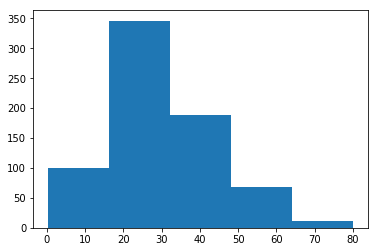

In [7]:
plt.hist(df_pre['Age'].dropna(),bins=5)

In [8]:
mean1 = df_pre[df_pre['Pclass']==1]['Age'].mean()
mean1
df_pre.loc[df_pre['Pclass']==1,'Age'] = df_pre[df_pre['Pclass']==1]['Age'].fillna(mean1)

mean2 = df_pre[df_pre['Pclass']==2]['Age'].mean()
mean2
df_pre.loc[df_pre['Pclass']==2,'Age'] = df_pre[df_pre['Pclass']==2]['Age'].fillna(mean2)

mean3 = df_pre[df_pre['Pclass']==3]['Age'].mean()
mean3
df_pre.loc[df_pre['Pclass']==3,'Age'] = df_pre[df_pre['Pclass']==3]['Age'].fillna(mean3)

In [9]:
df_pre['Age'].isnull().sum()

0

In [10]:
import seaborn as sns
import matplotlib as mpl

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


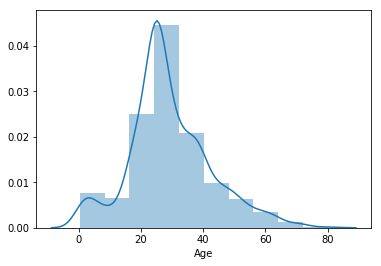

In [11]:
sns.distplot(df_pre['Age'],bins=10)

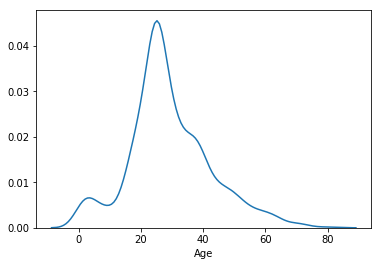

In [12]:
sns.distplot(df_pre['Age'],hist=False)

In [13]:
mpl.rcParams['figure.figsize'] = (15.0, 10.0)

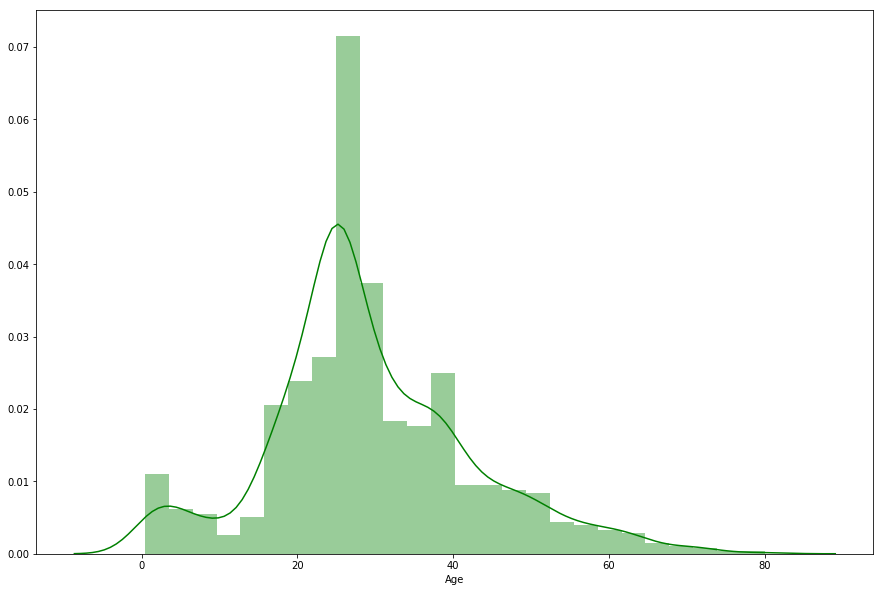

In [14]:
sns.distplot(df_pre['Age'],color='green')

In [15]:
df_pre.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Sex_num           0
Embarked_num      2
dtype: int64

In [16]:
df_pre.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Sex_num           0
Embarked_num      2
dtype: int64

In [18]:
del df_pre['Cabin']

In [19]:
df_pre.dropna(inplace=True)

# Modeling

In [20]:
df_test = df_pre[['Age','Fare']]
testsize = 260
trainsize = df_test[:-testsize].shape[0]
trainsize

629